## 数据类型
Pandas 的数据类型主要有以下几种，它们分别是：Series（一维数组），DataFrame（二维数组），Panel（三维数组），Panel4D（四维数组），PanelND（更多维数组）。其中 Series 和 DataFrame 应用的最为广泛，几乎占据了使用频率 90% 以上。
### Series 
就是序列，一个一维数组。其可以储存整数、浮点数、字符串等类型的数据。


In [2]:
import pandas
pandas.Series(data=None, index=None)


Series([], dtype: float64)

其中，data 可以是字典，或者NumPy 里的 ndarray 对象等。index 是数据索引，索引是 Pandas 数据结构中的一大特性，它主要的功能是帮助我们更快速地定位数据。

In [3]:
%matplotlib inline
import pandas as pd

s = pd.Series({'a': 10, 'b': 20, 'c': 30})
s

a    10
b    20
c    30
dtype: int64

In [5]:
#看数据类型
type(s)

pandas.core.series.Series

In [7]:
import numpy as np
#随机生成5个元素的series
s = pd.Series(np.random.randn(5))
s

0   -0.041592
1    0.034925
2    0.577883
3    0.584215
4    0.404504
dtype: float64

### DataFrame 
是 Pandas 中最为常见、最重要且使用频率最高的数据结构。DataFrame 和平常的电子表格或 SQL 表结构相似。你可以把 DataFrame 看成是 Series 的扩展类型，它仿佛是由多个 Series 拼合而成。它和 Series 的直观区别在于，数据不但具有行索引，且具有列索引。

In [8]:
pandas.DataFrame(data=None, index=None, columns=None)


""


- 一维数组、列表、字典或者 Series 字典。
- 二维或者结构化的 numpy.ndarray。
- 一个 Series 或者另一个 DataFrame。

In [9]:
#使用一个由 Series 组成的字典来构建 DataFrame
df = pd.DataFrame({'one': pd.Series([1, 2, 3]),
                   'two': pd.Series([4, 5, 6])})
df

,one,two
0,1,4
1,2,5
2,3,6


In [10]:
#直接通过一个列表构成的字典来生成 DataFrame
df = pd.DataFrame({'one': [1, 2, 3],
                   'two': [4, 5, 6]})
df

,one,two
0,1,4
1,2,5
2,3,6


In [11]:
#由带字典的列表生成 DataFrame
df = pd.DataFrame([{'one': 1, 'two': 4},
                   {'one': 2, 'two': 5},
                   {'one': 3, 'two': 6}])
df

,one,two
0,1,4
1,2,5
2,3,6


In [12]:
#基于二维数值来构建一个 DataFrame
pd.DataFrame(np.random.randint(5, size=(2, 4)))

,0,1,2,3
0,0,3,0,4
1,2,3,0,4


## 读取网络数据


In [13]:
df = pd.read_csv("https://labfile.oss.aliyuncs.com/courses/906/los_census.csv")
df

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


## 基本操作


In [14]:
# 默认显示前 5 条
df.head()  


,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [15]:
#显示后6条
df.tail(7)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
312,93550,74929,27.5,36414,38515,20864,3.58
313,93551,50798,37.0,25056,25742,15963,3.18
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53
318,93591,7285,30.9,3653,3632,1982,3.67


In [17]:
# 数据集概览
df.describe()
#显示数值类

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


In [19]:
#转为array
df.values


array([[9.1371e+04, 1.0000e+00, 7.3500e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.0001e+04, 5.7110e+04, 2.6600e+01, ..., 2.8642e+04, 1.2971e+04,
        4.4000e+00],
       [9.0002e+04, 5.1223e+04, 2.5500e+01, ..., 2.6347e+04, 1.1731e+04,
        4.3600e+00],
       ...,
       [9.3560e+04, 1.8910e+04, 3.2400e+01, ..., 9.4190e+03, 6.4690e+03,
        2.9200e+00],
       [9.3563e+04, 3.8800e+02, 4.4500e+01, ..., 1.2500e+02, 1.0300e+02,
        2.5300e+00],
       [9.3591e+04, 7.2850e+03, 3.0900e+01, ..., 3.6320e+03, 1.9820e+03,
        3.6700e+00]])

In [20]:
#查看索引
df.index  

RangeIndex(start=0, stop=319, step=1)

In [21]:
#查看列名
df.columns

Index(['Zip Code', 'Total Population', 'Median Age', 'Total Males',
       'Total Females', 'Total Households', 'Average Household Size'],
      dtype='object')

In [23]:
df.shape

(319, 7)

## 数据选择
### 基于索引数字选择
当我们新建一个 DataFrame 之后，如果未自己指定行索引或者列对应的标签，那么 Pandas 会默认从 0 开始以数字的形式作为行索引，并以数据集的第一行作为列对应的标签。其实，这里的「列」也有数字索引，默认也是从 0 开始，只是未显示出来。

所以，我们首先可以基于数字索引对数据集进行选择。这里用到的 Pandas 中的 .iloc 方法。该方法可以接受的类型有：

整数。例如：5  
整数构成的列表或数组。例如：[1, 2, 3]  
布尔数组。  
可返回索引值的函数或参数。

In [26]:
#前三行
df.iloc[:3]


,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


In [28]:
#第5行
df.iloc[5]

Zip Code                  90005.0
Total Population          37681.0
Median Age                   33.9
Total Males               19299.0
Total Females             18382.0
Total Households          15044.0
Average Household Size        2.5
Name: 5, dtype: float64

In [29]:
#1 3 5行
df.iloc[[1, 3, 5]]


,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
1,90001,57110,26.6,28468,28642,12971,4.40
3,90003,66266,26.3,32631,33635,15642,4.22
5,90005,37681,33.9,19299,18382,15044,2.50


In [30]:
#2 -4 列
df.iloc[:, 1:4]

,Total Population,Median Age,Total Males
0,1,73.5,0
1,57110,26.6,28468
2,51223,25.5,24876
3,66266,26.3,32631
4,62180,34.8,31302
...,...,...,...
314,38158,28.4,18711
315,2138,43.3,1121
316,18910,32.4,9491
317,388,44.5,263


### 基于标签名称选择
除了根据数字索引选择，还可以直接根据标签对应的名称选择。这里用到的方法和上面的 iloc 很相似，少了个 i 为 df.loc[]。

df.loc[] 可以接受的类型有：

- 单个标签。例如：2 或 'a'，这里的 2 指的是标签而不是索引位置。
- 列表或数组包含的标签。例如：['A', 'B', 'C']。
- 切片对象。例如：'A':'E'，注意这里和上面切片的不同支持，首尾都包含在内。
- 布尔数组。
- 可返回标签的函数或参数。

In [31]:
df.loc[0:2]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


In [32]:
df.loc[[0, 2, 4]]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
2,90002,51223,25.5,24876,26347,11731,4.36
4,90004,62180,34.8,31302,30878,22547,2.73


In [33]:
df.loc[:, 'Total Population':'Total Males']

,Total Population,Median Age,Total Males
0,1,73.5,0
1,57110,26.6,28468
2,51223,25.5,24876
3,66266,26.3,32631
4,62180,34.8,31302
...,...,...,...
314,38158,28.4,18711
315,2138,43.3,1121
316,18910,32.4,9491
317,388,44.5,263


In [34]:
df.loc[[0, 2], 'Median Age':]


,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,73.5,0,1,1,1.00
2,25.5,24876,26347,11731,4.36


## 数据删减



In [35]:
# 删除列行
df.drop(labels=['Median Age', 'Total Males'], axis=1)

,Zip Code,Total Population,Total Females,Total Households,Average Household Size
0,91371,1,1,1,1.00
1,90001,57110,28642,12971,4.40
2,90002,51223,26347,11731,4.36
3,90003,66266,33635,15642,4.22
4,90004,62180,30878,22547,2.73
...,...,...,...,...,...
314,93552,38158,19447,9690,3.93
315,93553,2138,1017,816,2.62
316,93560,18910,9419,6469,2.92
317,93563,388,125,103,2.53


In [36]:
df.drop_duplicates()


,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


In [37]:
df.dropna()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


## 数据填充
### 检测缺失值
Pandas 为了更方便地检测缺失值，将不同类型数据的缺失均采用 NaN 标记。这里的 NaN 代表 Not a Number，它仅仅是作为一个标记。例外是，在时间序列里，时间戳的丢失采用 NaT 标记。

Pandas 中用于检测缺失值主要用到两个方法，分别是：isna() 和 notna()，故名思意就是「是缺失值」和「不是缺失值」。默认会返回布尔值用于判断。

In [39]:
df = pd.DataFrame(np.random.rand(9, 5), columns=list('ABCDE'))
# 插入 T 列，并打上时间戳
df.insert(value=pd.Timestamp('2017-10-1'), loc=0, column='Time')
# 将 1, 3, 5 列的 1，3，5 行置为缺失值
df.iloc[[1, 3, 5, 7], [0, 2, 4]] = np.nan
# 将 2, 4, 6 列的 2，4，6 行置为缺失值
df.iloc[[2, 4, 6, 8], [1, 3, 5]] = np.nan
df

,Time,A,B,C,D,E
0,2017-10-01,0.804149,0.411184,0.844679,0.612614,0.571819
1,NaT,0.591201,NaN,0.974868,NaN,0.876625
2,2017-10-01,NaN,0.620257,NaN,0.743170,NaN
3,NaT,0.924337,NaN,0.631605,NaN,0.357195
4,2017-10-01,NaN,0.819688,NaN,0.810262,NaN
5,NaT,0.937390,NaN,0.954688,NaN,0.679458
6,2017-10-01,NaN,0.106407,NaN,0.182345,NaN
7,NaT,0.224693,NaN,0.204145,NaN,0.098066
8,2017-10-01,NaN,0.595292,NaN,0.592178,NaN


In [41]:
df.isna()

,Time,A,B,C,D,E
0,False,False,False,False,False,False
1,True,False,True,False,True,False
2,False,True,False,True,False,True
3,True,False,True,False,True,False
4,False,True,False,True,False,True
5,True,False,True,False,True,False
6,False,True,False,True,False,True
7,True,False,True,False,True,False
8,False,True,False,True,False,True


In [43]:
#用0填充
df.fillna(0)

,Time,A,B,C,D,E
0,2017-10-01 00:00:00,0.804149,0.411184,0.844679,0.612614,0.571819
1,0,0.591201,0.000000,0.974868,0.000000,0.876625
2,2017-10-01 00:00:00,0.000000,0.620257,0.000000,0.743170,0.000000
3,0,0.924337,0.000000,0.631605,0.000000,0.357195
4,2017-10-01 00:00:00,0.000000,0.819688,0.000000,0.810262,0.000000
5,0,0.937390,0.000000,0.954688,0.000000,0.679458
6,2017-10-01 00:00:00,0.000000,0.106407,0.000000,0.182345,0.000000
7,0,0.224693,0.000000,0.204145,0.000000,0.098066
8,2017-10-01 00:00:00,0.000000,0.595292,0.000000,0.592178,0.000000


In [44]:
#用缺失值前面的值
df.fillna(method='pad')

,Time,A,B,C,D,E
0,2017-10-01,0.804149,0.411184,0.844679,0.612614,0.571819
1,2017-10-01,0.591201,0.411184,0.974868,0.612614,0.876625
2,2017-10-01,0.591201,0.620257,0.974868,0.743170,0.876625
3,2017-10-01,0.924337,0.620257,0.631605,0.743170,0.357195
4,2017-10-01,0.924337,0.819688,0.631605,0.810262,0.357195
5,2017-10-01,0.937390,0.819688,0.954688,0.810262,0.679458
6,2017-10-01,0.937390,0.106407,0.954688,0.182345,0.679458
7,2017-10-01,0.224693,0.106407,0.204145,0.182345,0.098066
8,2017-10-01,0.224693,0.595292,0.204145,0.592178,0.098066


In [45]:
#用后面的值
df.fillna(method='bfill')

,Time,A,B,C,D,E
0,2017-10-01,0.804149,0.411184,0.844679,0.612614,0.571819
1,2017-10-01,0.591201,0.620257,0.974868,0.743170,0.876625
2,2017-10-01,0.924337,0.620257,0.631605,0.743170,0.357195
3,2017-10-01,0.924337,0.819688,0.631605,0.810262,0.357195
4,2017-10-01,0.937390,0.819688,0.954688,0.810262,0.679458
5,2017-10-01,0.937390,0.106407,0.954688,0.182345,0.679458
6,2017-10-01,0.224693,0.106407,0.204145,0.182345,0.098066
7,2017-10-01,0.224693,0.595292,0.204145,0.592178,0.098066
8,2017-10-01,NaN,0.595292,NaN,0.592178,NaN


In [46]:
df.iloc[[3, 5], [1, 3, 5]] = np.nan

In [47]:
df.fillna(method='pad')

,Time,A,B,C,D,E
0,2017-10-01,0.804149,0.411184,0.844679,0.612614,0.571819
1,2017-10-01,0.591201,0.411184,0.974868,0.612614,0.876625
2,2017-10-01,0.591201,0.620257,0.974868,0.743170,0.876625
3,2017-10-01,0.591201,0.620257,0.974868,0.743170,0.876625
4,2017-10-01,0.591201,0.819688,0.974868,0.810262,0.876625
5,2017-10-01,0.591201,0.819688,0.974868,0.810262,0.876625
6,2017-10-01,0.591201,0.106407,0.974868,0.182345,0.876625
7,2017-10-01,0.224693,0.106407,0.204145,0.182345,0.098066
8,2017-10-01,0.224693,0.595292,0.204145,0.592178,0.098066


In [48]:
df.fillna(method='pad', limit=1)  # 最多填充一项

,Time,A,B,C,D,E
0,2017-10-01,0.804149,0.411184,0.844679,0.612614,0.571819
1,2017-10-01,0.591201,0.411184,0.974868,0.612614,0.876625
2,2017-10-01,0.591201,0.620257,0.974868,0.743170,0.876625
3,2017-10-01,NaN,0.620257,NaN,0.743170,NaN
4,2017-10-01,NaN,0.819688,NaN,0.810262,NaN
5,2017-10-01,NaN,0.819688,NaN,0.810262,NaN
6,2017-10-01,NaN,0.106407,NaN,0.182345,NaN
7,2017-10-01,0.224693,0.106407,0.204145,0.182345,0.098066
8,2017-10-01,0.224693,0.595292,0.204145,0.592178,0.098066


In [50]:
df.fillna(df.mean()['C':'E']) #对 C 列到 E 列用平均值填充

,Time,A,B,C,D,E
0,2017-10-01,0.804149,0.411184,0.844679,0.612614,0.571819
1,NaT,0.591201,NaN,0.974868,0.588114,0.876625
2,2017-10-01,NaN,0.620257,0.674564,0.743170,0.515503
3,NaT,NaN,NaN,0.674564,0.588114,0.515503
4,2017-10-01,NaN,0.819688,0.674564,0.810262,0.515503
5,NaT,NaN,NaN,0.674564,0.588114,0.515503
6,2017-10-01,NaN,0.106407,0.674564,0.182345,0.515503
7,NaT,0.224693,NaN,0.204145,0.588114,0.098066
8,2017-10-01,NaN,0.595292,0.674564,0.592178,0.515503


### 插值填充
插值是数值分析中一种方法。简而言之，就是借助于一个函数（线性或非线性），再根据已知数据去求解未知数据的值。插值在数据领域非常常见，它的好处在于，可以尽量去还原数据本身的样子。

我们可以通过 interpolate() 方法完成线性插值


In [52]:
# 生成一个 DataFrame
df = pd.DataFrame({'A': [1.1, 2.2, np.nan, 4.5, 5.7, 6.9],
                   'B': [.21, np.nan, np.nan, 3.1, 11.7, 13.2]})
df

,A,B
0,1.1,0.21
1,2.2,NaN
2,NaN,NaN
3,4.5,3.10
4,5.7,11.70
5,6.9,13.20


In [53]:
df_interpolate = df.interpolate()
df_interpolate

,A,B
0,1.10,0.210000
1,2.20,1.173333
2,3.35,2.136667
3,4.50,3.100000
4,5.70,11.700000
5,6.90,13.200000


对于 interpolate() 支持的插值算法，也就是 method=。下面给出几条选择的建议：

如果你的数据增长速率越来越快，可以选择 method='quadratic'二次插值。  
如果数据集呈现出累计分布的样子，推荐选择 method='pchip'。  
如果需要填补缺省值，以平滑绘图为目标，推荐选择 method='akima'。

## 数据可视化

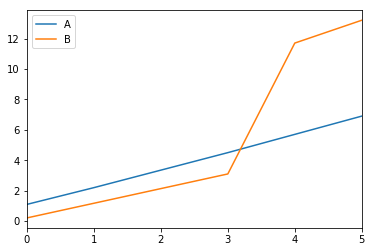

In [54]:
df_interpolate.plot()

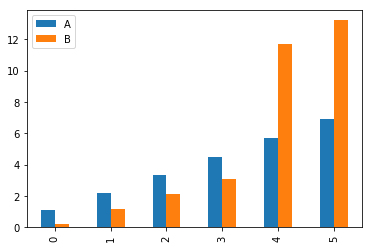

In [55]:
df_interpolate.plot(kind='bar')